## Customer Segmentation with K-means

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

### Run k-means

In [4]:
datamart_rfm = pd.read_csv('datamart_rfm.csv')

In [5]:
datamart_log = np.log(datamart_rfm)


scaler = StandardScaler()
scaler.fit(datamart_log)


datamart_normalized = scaler.transform(datamart_log)

In [6]:

from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=3, random_state=1) 


kmeans.fit(datamart_normalized)


cluster_labels = kmeans.labels_

### Assign labels to raw data

In [7]:

datamart_rfm_k3 = datamart_rfm.assign(Cluster=cluster_labels)


grouped = datamart_rfm_k3.groupby(['Cluster'])


grouped.agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean', 'count']
  }).round(1)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          16.1      50.1        1050.6   901
1         166.6       3.0          53.0  1156
2          77.1      12.3         216.0  1586

### Calculate sum of squared errors

In [8]:
sse = {}

In [10]:

for k in range(1, 15):
  
    
    kmeans = KMeans(n_clusters=k, random_state=1)
    
    
    kmeans.fit(datamart_normalized)
    
    
    sse[k] = kmeans.inertia_ 

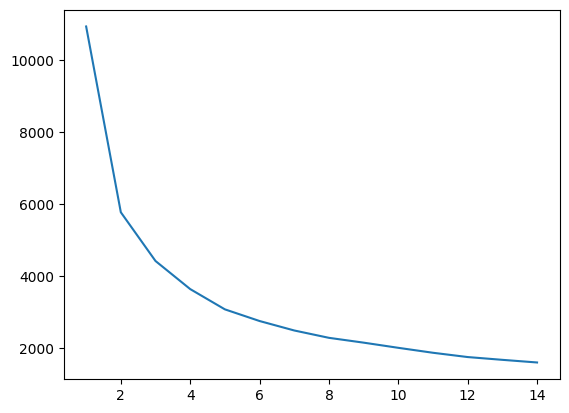

In [14]:
plt.plot(sse.keys(), sse.values());